In [1]:
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.preprocessing import scale
seaborn.set()
%matplotlib inline

data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv")
del data["Channel"]
del data["Region"]
data.head()

/Users/paulocotta/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/paulocotta/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/paulocotta/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [2]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Text(0.5,1,'Gastos por cluster')

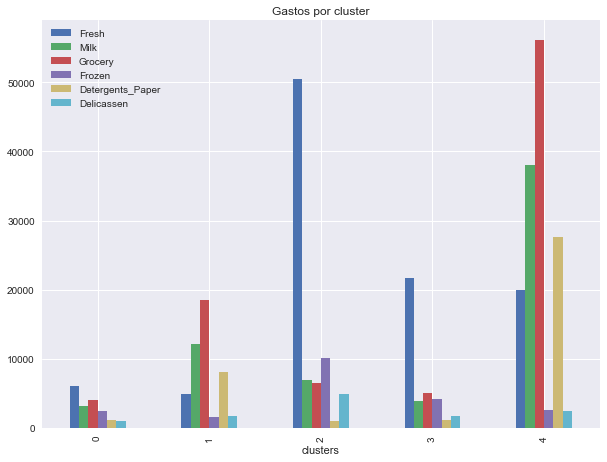

In [3]:
data_array = data.values
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=1234)
data["clusters"] = kmeans.fit_predict(data_array)
data.groupby("clusters").aggregate("mean").plot.bar(figsize=(10,7.5))
plt.title("Gastos por cluster")

In [4]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=1234)
    kmeans.fit(data)
    inertia.append((i,kmeans.inertia_,))

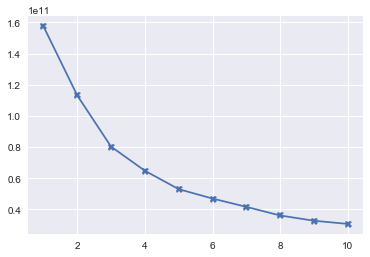

In [5]:
plt.plot([w[0] for w in inertia],[w[1] for w in inertia], marker="X")

In [6]:
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=1234)
kmeans.fit(data)
cluster_list = kmeans.labels_

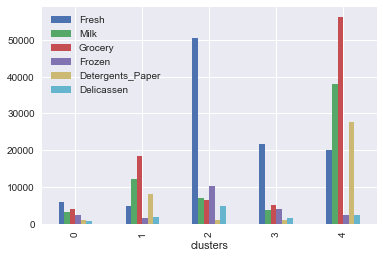

In [7]:
data["clusters"] = cluster_list
data.groupby("clusters").aggregate("mean").plot.bar()